# Neural network classification 

### data

In [72]:
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn

In [73]:
N_SAMPLES = 1000
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X, y = make_circles(N_SAMPLES,
                    noise=0.04,
                    random_state=42)

X, y = torch.tensor(X, dtype=torch.float), torch.tensor(y, dtype=torch.float)

from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=TEST_SIZE,
                                                   random_state=42)

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
print(len(X_train), len(X_test))

800 200


In [74]:
circles = pd.DataFrame({"X1" : X[:, 0],
                        "X2" : X[:, 1],
                        "y" : y})
circles

,X1,X2,y
0,0.748227,0.239083,1.0
1,-0.745096,0.160975,1.0
2,-0.822625,0.197621,1.0
3,-0.411433,0.682556,1.0
4,0.443905,-0.895829,0.0
...,...,...,...
995,0.246572,0.934956,0.0
996,-0.982012,-0.280268,0.0
997,-0.132565,-0.818072,1.0
998,0.665633,-0.780346,0.0


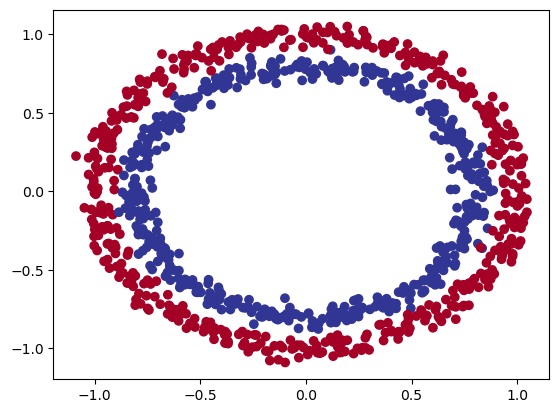

In [75]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)
plt.show()

In [76]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

### building a model

In [77]:
class CircleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=16)
        self.layer2 = nn.Linear(in_features=16, out_features=1)
    
    def forward(self, x):
        return self.layer2(self.layer1(x))
    
model = CircleModel().to(device)
model, next(model.parameters()).device

(CircleModel(
   (layer1): Linear(in_features=2, out_features=16, bias=True)
   (layer2): Linear(in_features=16, out_features=1, bias=True)
 ),
 device(type='cuda', index=0))

In [78]:
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=16),
    nn.Linear(in_features=16, out_features=1)
).to(device)

model, next(model.parameters()).device

(Sequential(
   (0): Linear(in_features=2, out_features=16, bias=True)
   (1): Linear(in_features=16, out_features=1, bias=True)
 ),
 device(type='cuda', index=0))

In [79]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1473,  0.5865],
                      [-0.4191, -0.4217],
                      [-0.4217,  0.6360],
                      [ 0.2356,  0.6804],
                      [-0.5836, -0.7014],
                      [-0.5532, -0.4757],
                      [ 0.2864,  0.2532],
                      [ 0.5876, -0.3652],
                      [-0.4820,  0.3752],
                      [-0.2858,  0.4292],
                      [-0.1678,  0.4045],
                      [-0.5494, -0.3568],
                      [ 0.2156,  0.1495],
                      [-0.1803,  0.4215],
                      [ 0.4807, -0.5128],
                      [-0.3775,  0.6475]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2386, -0.2507, -0.6842, -0.4049,  0.1766, -0.0933, -0.5133,  0.0166,
                      -0.4830, -0.5999, -0.3894, -0.6189, -0.4502,  0.7068,  0.1336,  0.2179],
                     device='cuda:0')),
             ('1.weight',
   

In [80]:
with torch.inference_mode():
    y_logits = model(X_test)
    
print(len(y_logits), y_logits.shape)

200 torch.Size([200, 1])


In [81]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.05)

In [82]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

### train model

In [83]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs = torch.round(y_pred_probs)
print(y_pred_probs.squeeze())

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0')


In [84]:
y_pred_labels = torch.round(torch.sigmoid(model(X_test)))
y_pred_labels.squeeze()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [85]:
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)
torch.manual_seed(42)
epochs = 5000
for epoch in range(epochs):
    model.train() #training
    
    y_logits = model(X_train).squeeze() #forward pass 
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, #calculate loss
                   y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred) 
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits,
                             y_test)
        test_acc = accuracy_fn(y_true=y_test, 
                               y_pred=test_pred)
        
        if epoch % 10 == 0:
            print(f"{epoch} | {loss} | {acc}")
    
    

0 | 0.715473473072052 | 50.0
10 | 0.7024340033531189 | 57.375
20 | 0.6976252794265747 | 53.37499999999999
30 | 0.6956236362457275 | 52.25
40 | 0.6946513056755066 | 52.37500000000001
50 | 0.6941040754318237 | 52.125
60 | 0.6937611699104309 | 51.87500000000001
70 | 0.6935321688652039 | 51.5
80 | 0.6933736801147461 | 51.74999999999999
90 | 0.6932623982429504 | 51.625
100 | 0.6931833028793335 | 51.87500000000001
110 | 0.6931267976760864 | 51.625
120 | 0.6930862069129944 | 51.5
130 | 0.6930572390556335 | 51.5
140 | 0.6930362582206726 | 51.37500000000001
150 | 0.6930210590362549 | 51.37500000000001
160 | 0.6930102109909058 | 51.24999999999999
170 | 0.6930022835731506 | 51.24999999999999
180 | 0.6929965019226074 | 51.37500000000001
190 | 0.6929923892021179 | 51.37500000000001
200 | 0.6929893493652344 | 51.24999999999999
210 | 0.6929870247840881 | 51.24999999999999
220 | 0.6929853558540344 | 51.37500000000001
230 | 0.6929841637611389 | 51.24999999999999
240 | 0.6929833889007568 | 51.125
250 | 

In [86]:
import requests 
from pathlib import Path

if Path("helper_function.py").is_file():
    print("file already exists")
else:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open('helper_functions.py', 'wb') as file:
        file.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

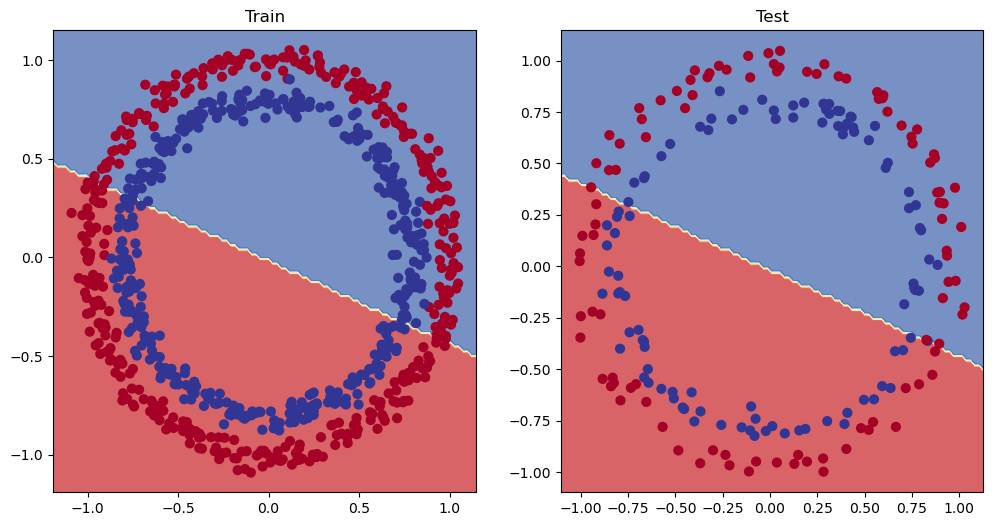

In [87]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [88]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__() 
        self.layer_1 = nn.Linear(in_features=2, out_features=16)
        self.layer_2 = nn.Linear(in_features=16, out_features=16)
        self.layer_3 = nn.Linear(in_features=16, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z 
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model = CircleModelV2().to(device)
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802],
                      [-0.3258, -0.0829],
                      [-0.2872,  0.4691],
                      [-0.5582, -0.3260],
                      [-0.1997, -0.4252],
                      [ 0.0667, -0.6984],
                      [ 0.6386, -0.6007]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.5459,  0.1177, -0.2296,  0.4370,  0.1102,  0.5713,  0.0773, -0.2230,
                       0.1900, -0.1918,  0.2976,  0.6313,  0.4087, -0.3091,  0.4082,  0.1265],
                     device='cuda:0')),
             ('la

In [89]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.05)

In [90]:
model.to(device)
torch.manual_seed(42)
epochs = 5000

for epoch in range(epochs):
    model.train()
    
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) 
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
        if epoch % 10 == 0:
            print(f"< {epoch} > < {test_loss} | {loss} > < {test_acc} | {acc} > ")
        


< 0 > < 0.6980538964271545 | 0.6975259780883789 > < 50.0 | 50.0 > 
< 10 > < 0.6963923573493958 | 0.6955622434616089 > < 50.0 | 50.0 > 
< 20 > < 0.6954063177108765 | 0.6944003105163574 > < 50.0 | 50.0 > 
< 30 > < 0.6947776675224304 | 0.6936370134353638 > < 50.0 | 50.0 > 
< 40 > < 0.6943252682685852 | 0.6930839419364929 > < 50.0 | 50.0 > 
< 50 > < 0.6939719915390015 | 0.6926550269126892 > < 50.0 | 50.0 > 
< 60 > < 0.6936942934989929 | 0.6923165917396545 > < 50.0 | 50.0 > 
< 70 > < 0.6934751868247986 | 0.6920398473739624 > < 50.0 | 50.0 > 
< 80 > < 0.6932856440544128 | 0.6918085217475891 > < 50.0 | 50.0 > 
< 90 > < 0.6931118369102478 | 0.6916072964668274 > < 50.0 | 50.0 > 
< 100 > < 0.6929467916488647 | 0.6914231777191162 > < 50.0 | 50.0 > 
< 110 > < 0.6927844285964966 | 0.6912518739700317 > < 50.0 | 50.0 > 
< 120 > < 0.6926218867301941 | 0.6910882592201233 > < 50.0 | 50.125 > 
< 130 > < 0.6924654841423035 | 0.6909269690513611 > < 46.0 | 49.875 > 
< 140 > < 0.6923190951347351 | 0.69077146

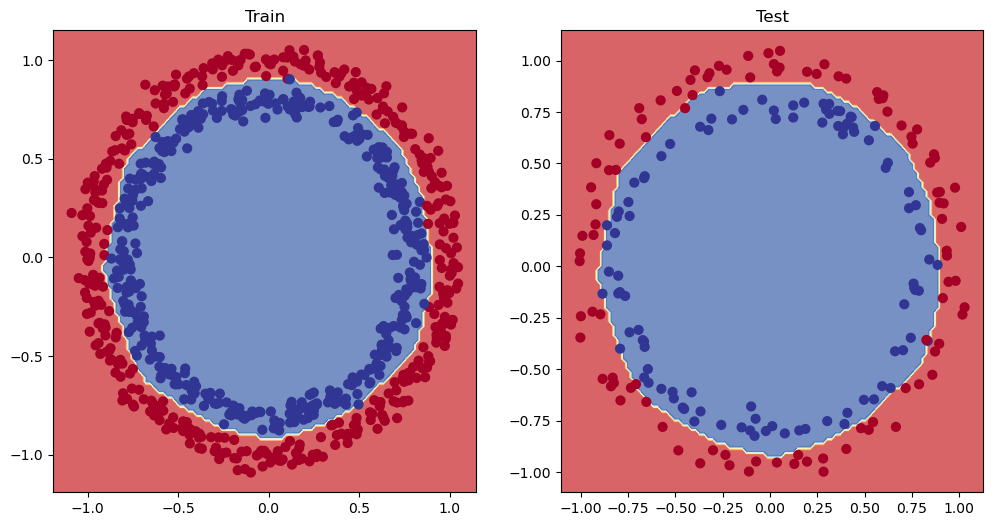

In [91]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

### non-linear activation functions

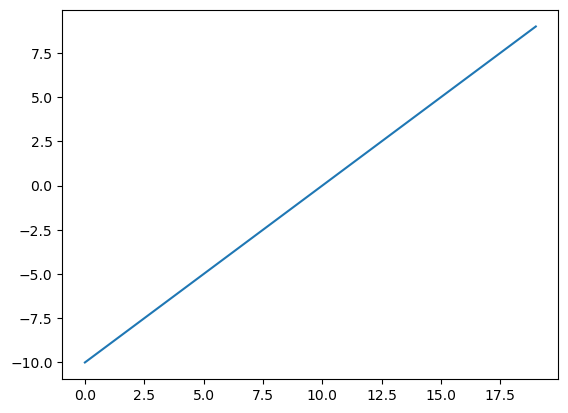

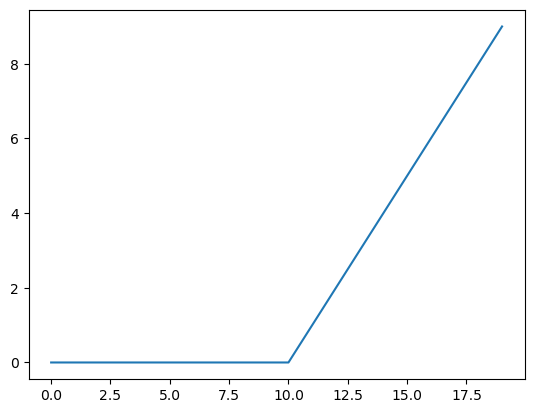

In [95]:
A = torch.arange(-10, 10, 1, dtype=torch.float)
plt.plot(A)
plt.show()

plt.plot(torch.relu(A))
plt.show()

In [98]:
def relu(x: torch.Tensor):
    return torch.max(torch.tensor(0), x)

relu(torch.tensor(-1)), relu(torch.tensor(5)), relu(torch.tensor(0))

(tensor(0), tensor(5), tensor(0))

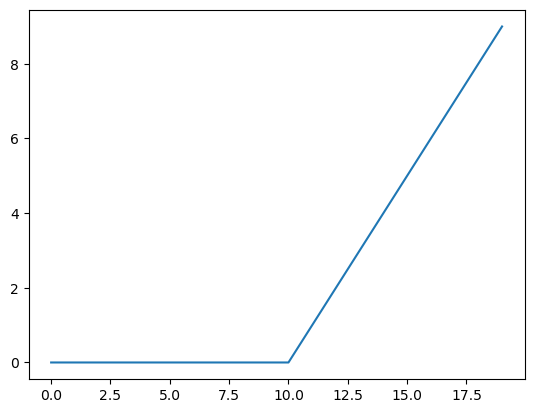

In [101]:
plt.plot(list(map(relu, A)))

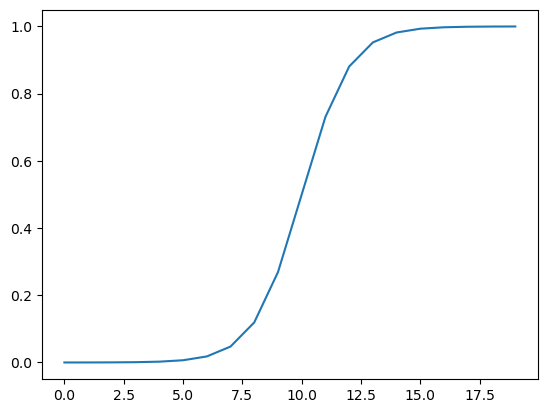

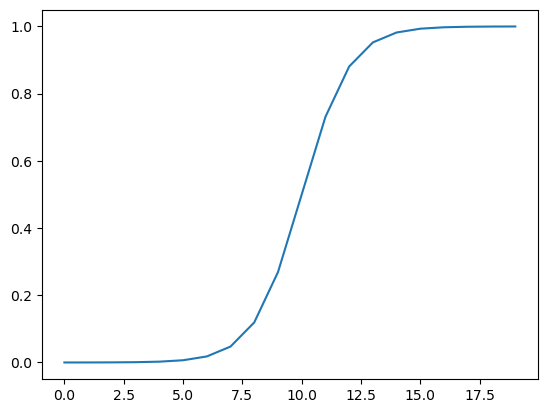

In [105]:
def sigmoid(x: torch.Tensor):
    return 1 / (1 + torch.exp(-x))

plt.plot(list(map(sigmoid, A)))
plt.show()

plt.plot(sigmoid(A))
plt.show()